# Salisbury Air Quality EDA

In [124]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

## ETL

In [125]:
# Read in CSV into DataFrame.

df1 = pd.read_csv('/content/data-selector-export (1).csv')
df2 = pd.read_csv('/content/data-selector-export (2).csv')

df = pd.concat([df1, df2], ignore_index=True).drop_duplicates().reset_index(drop=True)
df.head()

,Date / time,Site,Pollutant,Measurement,Status,Unit
0,01/01/2019 01:00,"Salisbury, Exeter Street",PM₁₀,23,R,µg/m³ (VCM)
1,01/01/2019 01:00,"Salisbury, Exeter Street",NO,10,R,µg/m³
2,01/01/2019 01:00,"Salisbury, Exeter Street",NO₂,27,R,µg/m³
3,01/01/2019 01:00,"Salisbury, Exeter Street",NOₓ as NO₂,43,R,µg/m³
4,01/01/2019 02:00,"Salisbury, Exeter Street",PM₁₀,18,R,µg/m³ (VCM)


In [126]:
df.tail()

,Date / time,Site,Pollutant,Measurement,Status,Unit
65175,13/11/2020 20:00,"Salisbury, Exeter Street",NOₓ as NO₂,101,P,µg/m³
65176,13/11/2020 21:00,"Salisbury, Exeter Street",PM₁₀,19,P,µg/m³ (VCM)
65177,13/11/2020 21:00,"Salisbury, Exeter Street",NO,20,P,µg/m³
65178,13/11/2020 21:00,"Salisbury, Exeter Street",NO₂,40,P,µg/m³
65179,13/11/2020 21:00,"Salisbury, Exeter Street",NOₓ as NO₂,70,P,µg/m³


In [127]:
df.shape

(65180, 6)

In [128]:
# Separate date and time column.

df["Date"] = df["Date / time"].apply(lambda x: x[:10])
df["Time"] = df["Date / time"].apply(lambda x: x[11:])
df.drop(["Date / time", "Site"], axis=1, inplace=True)

In [129]:
df.head()

,Pollutant,Measurement,Status,Unit,Date,Time
0,PM₁₀,23,R,µg/m³ (VCM),01/01/2019,01:00
1,NO,10,R,µg/m³,01/01/2019,01:00
2,NO₂,27,R,µg/m³,01/01/2019,01:00
3,NOₓ as NO₂,43,R,µg/m³,01/01/2019,01:00
4,PM₁₀,18,R,µg/m³ (VCM),01/01/2019,02:00


In [132]:
# Change date to datetime format.

def change_date(d):

  # Convert the string into datetime object.
  d = datetime.datetime.strptime(d, "%d/%m/%Y")
  
  # Convert datetime back into string but in specified format
  d = datetime.datetime.strftime(d, "%m-%d-%Y")
  d = datetime.datetime.strptime(d, "%m-%d-%Y")

  return d

In [133]:
# Change date format.
df["Date"] = df["Date"].apply(change_date)

In [134]:
df.head()

,Pollutant,Measurement,Status,Unit,Date,Time
0,PM₁₀,23,R,µg/m³ (VCM),2019-01-01,01:00
1,NO,10,R,µg/m³,2019-01-01,01:00
2,NO₂,27,R,µg/m³,2019-01-01,01:00
3,NOₓ as NO₂,43,R,µg/m³,2019-01-01,01:00
4,PM₁₀,18,R,µg/m³ (VCM),2019-01-01,02:00


In [135]:
# Cleand measurement column and cast to int.

df["Measurement"] = df["Measurement"].apply(lambda x: None if x.isalpha() else int(x))
df.dropna(inplace=True)

In [136]:
df_pivoted_by_hour = df.pivot_table('Measurement', ['Date', 'Time'], 'Pollutant')
df_pivoted_by_day = df.pivot_table('Measurement', ['Date'], 'Pollutant')
df_pivoted_by_day.head()

Pollutant,NO,NO₂,NOₓ as NO₂,PM₁₀
Date,,,,
2019-01-01,18.666667,32.000000,60.583333,19.333333
2019-01-02,45.750000,50.583333,120.958333,26.041667
2019-01-03,41.500000,55.416667,119.041667,25.416667
2019-01-04,94.208333,65.750000,210.333333,40.583333
2019-01-05,46.875000,47.541667,119.583333,32.333333


In [137]:
df_pivoted_by_hour.head()

Pollutant           NO   NO₂  NOₓ as NO₂  PM₁₀
Date       Time                               
2019-01-01 01:00  10.0  27.0        43.0  23.0
           02:00  10.0  24.0        39.0  18.0
           03:00   9.0  23.0        36.0  17.0
           04:00   6.0  22.0        31.0  16.0
           05:00  10.0  23.0        39.0  15.0

## Descriptive Statistics

In [138]:
df_desc_by_hour = df_pivoted_by_hour.describe()
df_desc_by_hour.head()

Pollutant,NO,NO₂,NOₓ as NO₂,PM₁₀
count,16219.000000,16219.000000,16219.000000,15324.000000
mean,24.687465,27.195573,65.048153,20.282955
std,31.195718,18.466362,63.920460,13.511158
min,0.000000,-2.000000,-1.000000,-4.000000
25%,4.000000,13.000000,20.000000,12.000000


In [139]:
df_desc_by_day = df_pivoted_by_day.describe()
df_desc_by_day.head()

Pollutant,NO,NO₂,NOₓ as NO₂,PM₁₀
count,679.000000,679.000000,679.000000,644.000000
mean,24.653240,27.184897,64.985094,20.248352
std,18.030419,10.811444,37.205590,8.660843
min,1.250000,4.291667,8.291667,5.250000
25%,11.666667,19.479167,38.729167,14.333333


## Data Visualization

In [180]:
def plot_by_date(df, y1, m1, d1, y2, m2, d2):

  start_1 = datetime.date(y1, m1, d1)
  end_1 = datetime.date(y2, m2, d2)

  start_2 = datetime.date((y1-1), m1, d1)
  end_2 = datetime.date((y2-1), m2, d2)

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(18.5, 10.5)

  # Lineplot.
  ax[0].set_title('Measurement of Air Pollutants in Salisbury from {} to {}'.format(start_2, end_2))
  ax[1].set_title('Measurement of Air Pollutants in Salisbury from {} to {}'.format(start_1, end_1))

  sns.lineplot(data=df, x="Date", y="Measurement", hue="Pollutant", ax=ax[0]).set_xlim(start_2, end_2)
  sns.lineplot(data=df, x="Date", y="Measurement", hue="Pollutant", ax=ax[1]).set_xlim(start_1, end_1)

  fig.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8321 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 

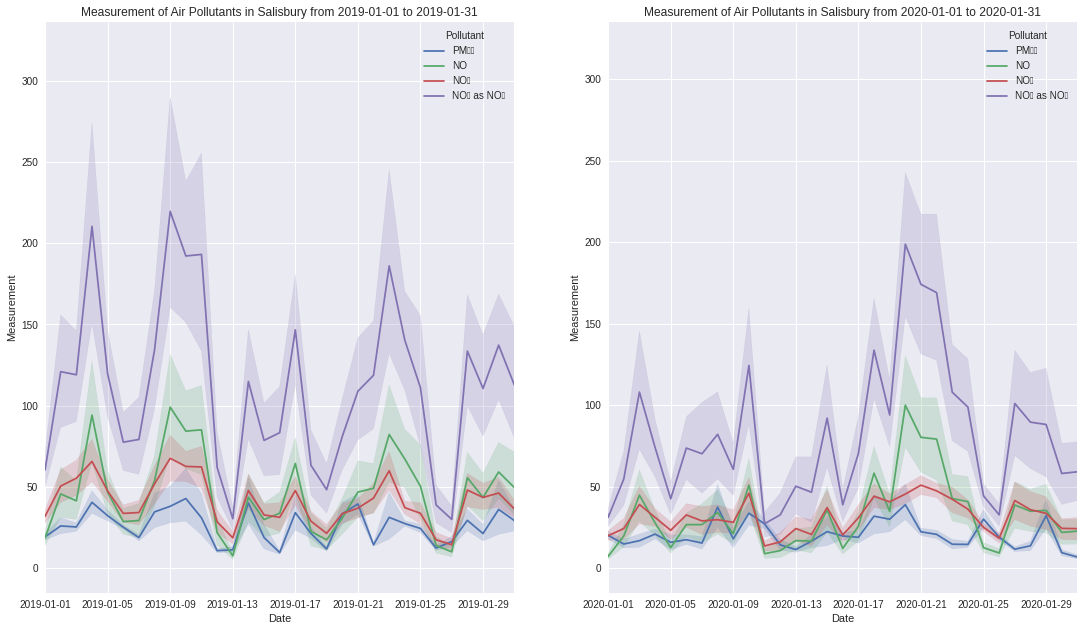

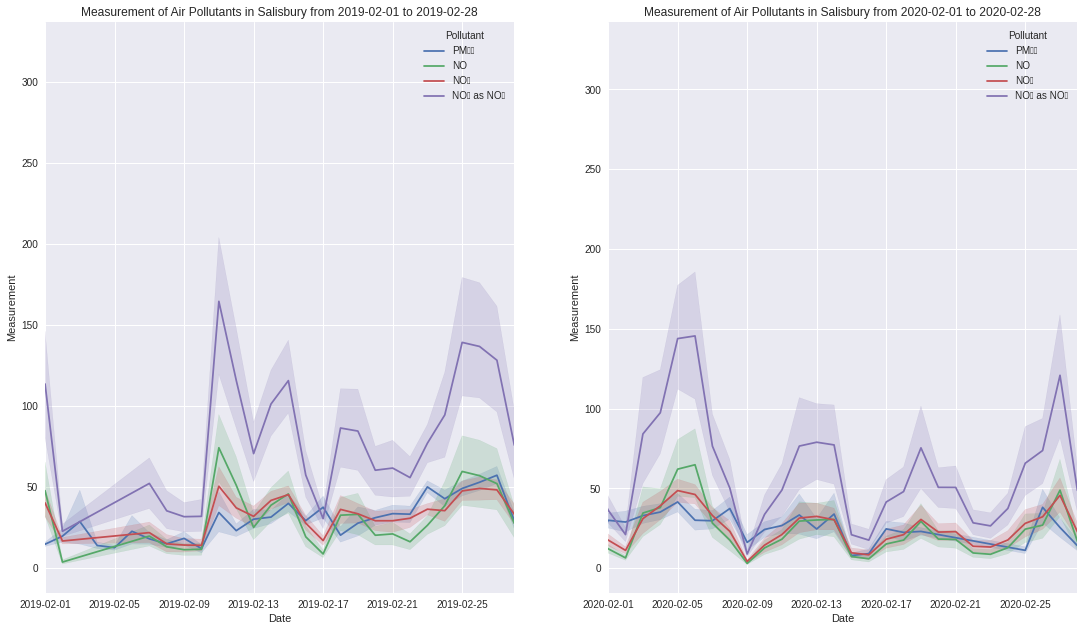

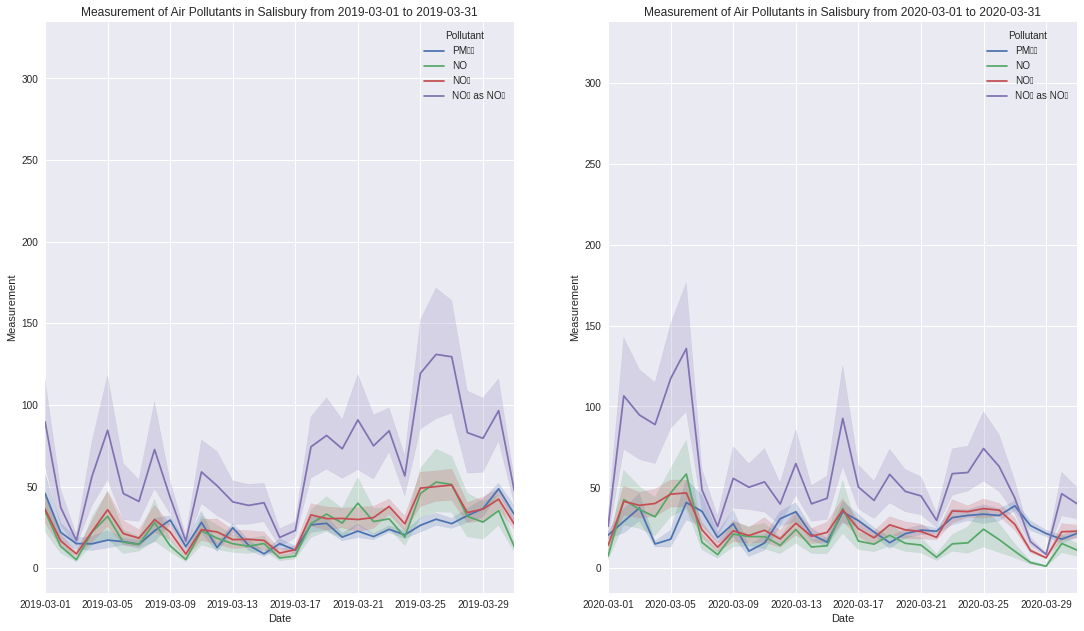

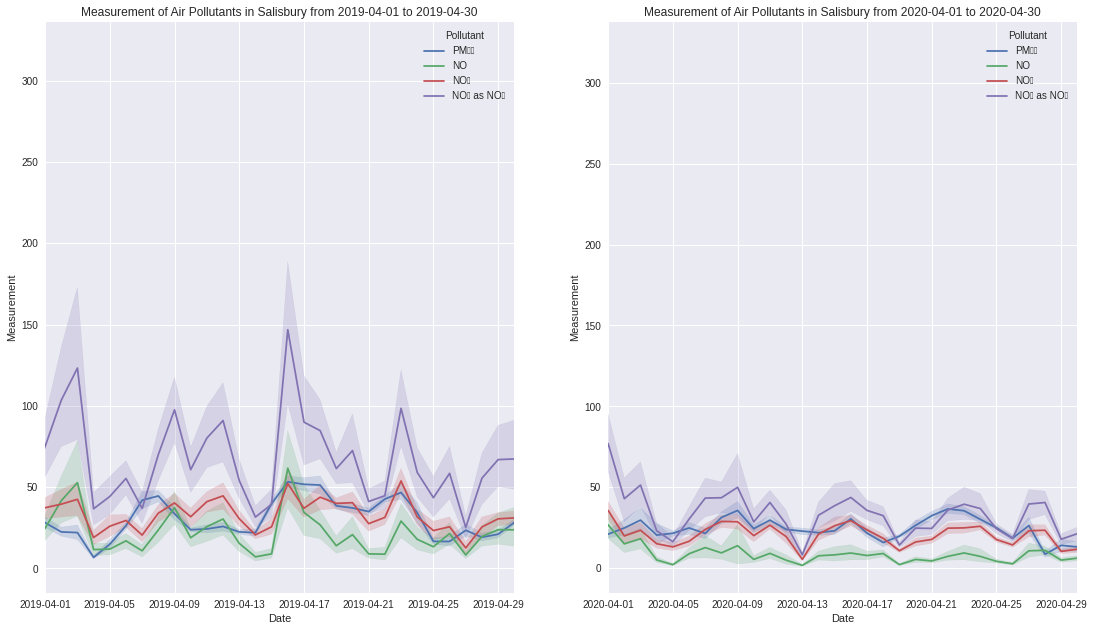

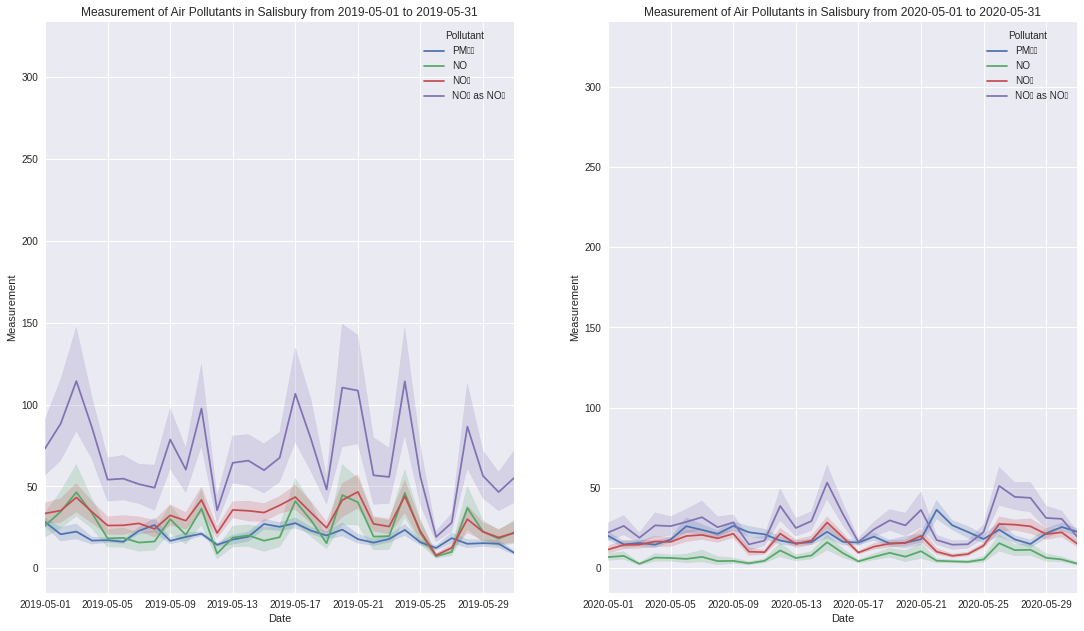

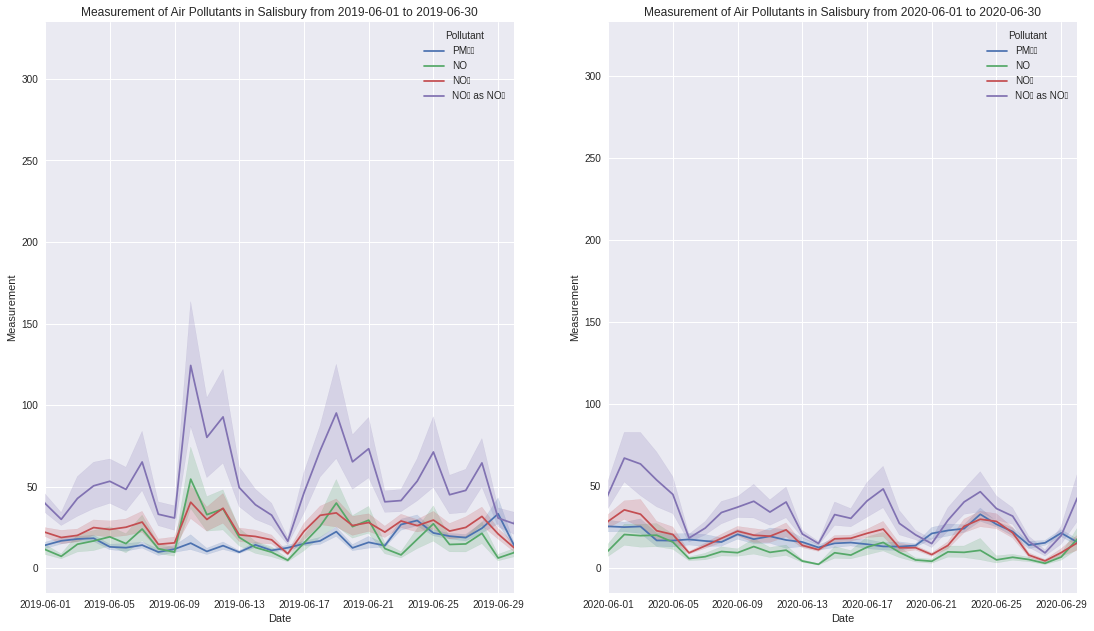

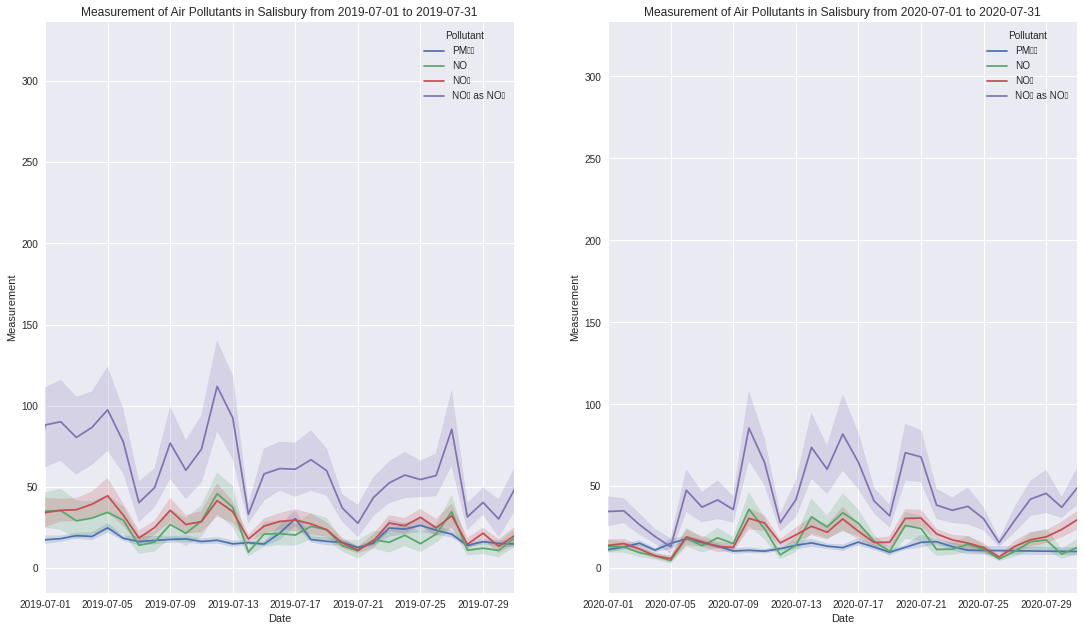

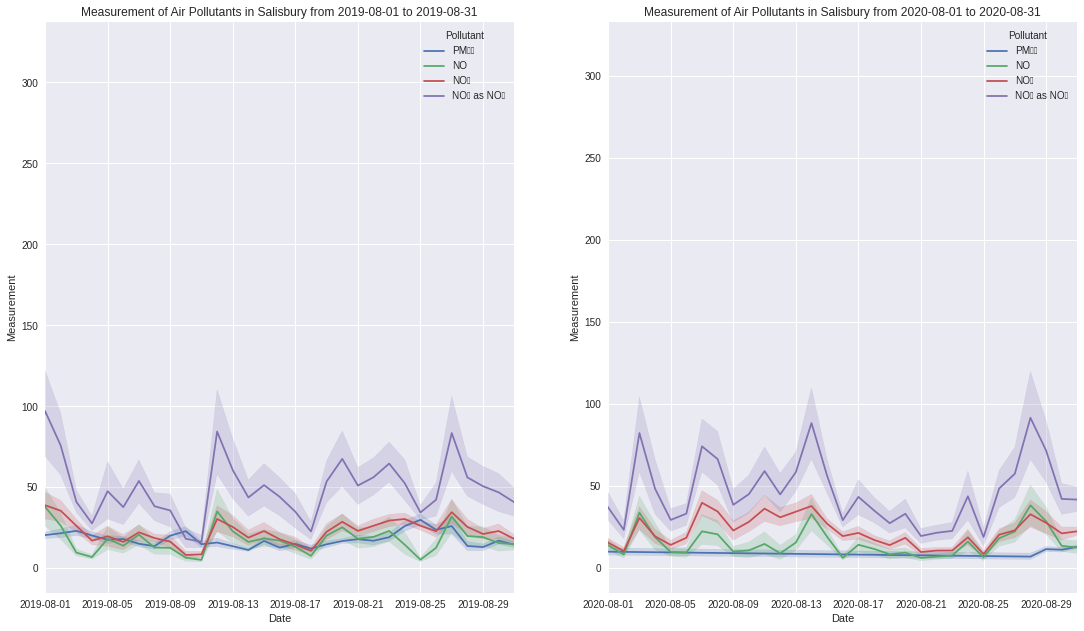

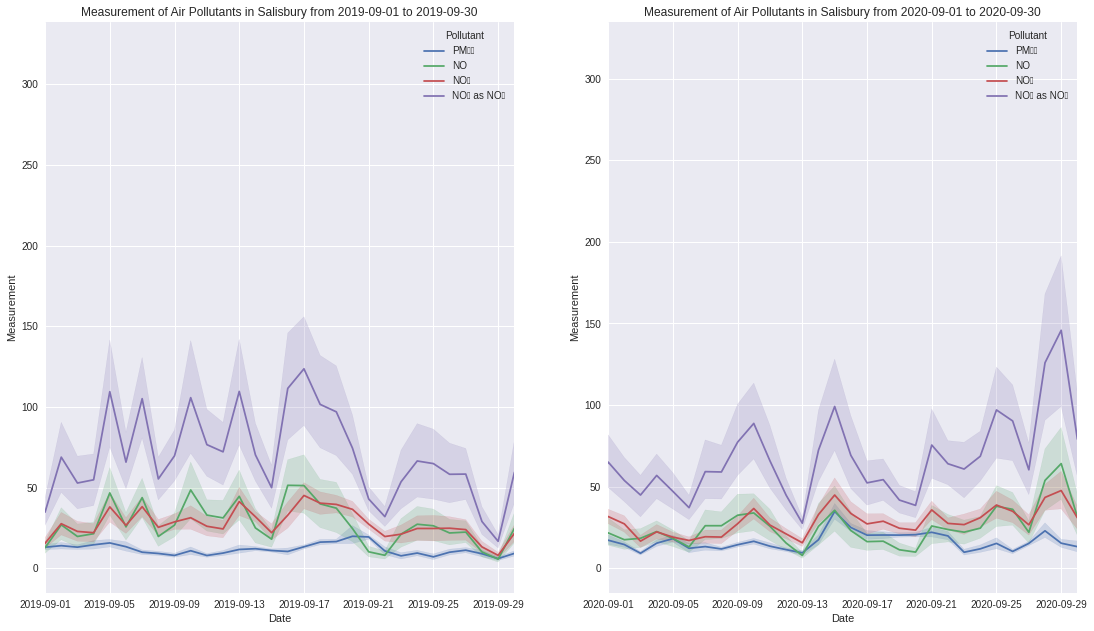

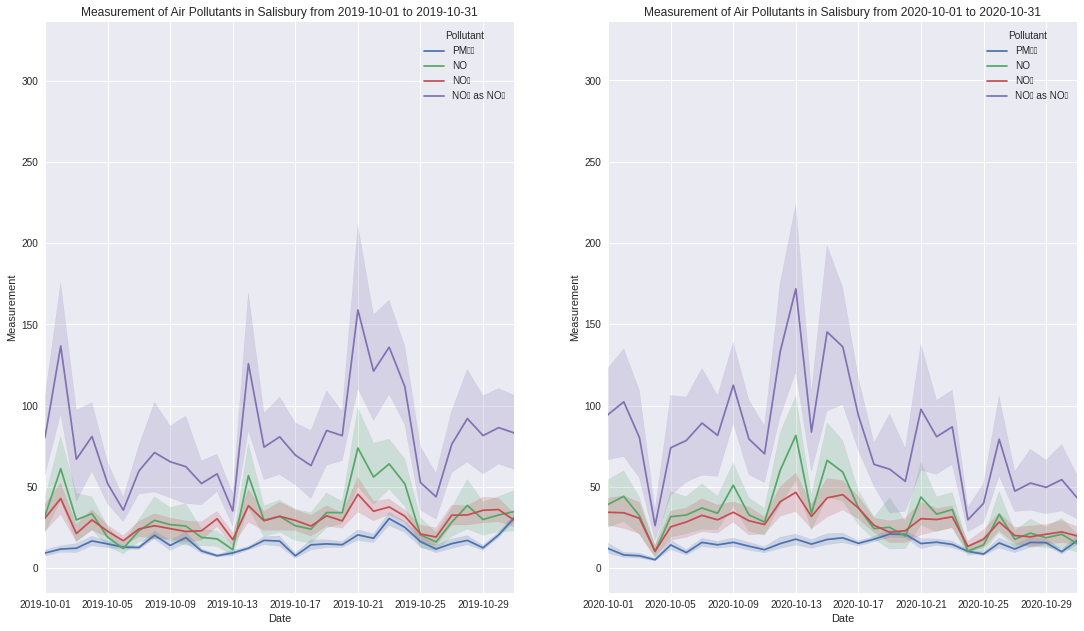

In [182]:
for i in range(1, 11):

  if i in [1, 3, 5, 7, 8, 10]:
    j = 31
  else:
    j = 30
  
  if i == 2:
    j = 28 

  plot_by_date(df, 2020, i, 1, 2020, i, j)

## Lockdown Period Comparison to 2019

In [58]:
def get_slice(df, start, end):
  
  df_slice = df.loc[(df['Date'] >= start) & (df["Date"] <= end)]
  return df_slice

In [187]:
df_slice_19 = get_slice(df, '2019-03-01', '2019-07-31')
df_slice_19 = df_slice_19.pivot_table('Measurement', ['Date'], 'Pollutant')
df_slice_19.head()

Pollutant,NO,NO₂,NOₓ as NO₂,PM₁₀
Date,,,,
2019-03-01,34.958333,36.208333,89.708333,45.791667
2019-03-02,13.375000,16.750000,37.250000,21.958333
2019-03-03,5.250000,8.833333,17.000000,15.125000
2019-03-04,22.166667,22.416667,56.291667,15.000000
2019-03-05,31.791667,35.875000,84.541667,17.250000


In [188]:
df_slice_20 = get_slice(df, '2020-03-01', '2020-07-31')
df_slice_20 = df_slice_20.pivot_table('Measurement', ['Date'], 'Pollutant')
df_slice_20.head()

Pollutant,NO,NO₂,NOₓ as NO₂,PM₁₀
Date,,,,
2020-03-01,7.625000,14.166667,25.958333,20.500000
2020-03-02,42.416667,41.333333,106.541667,28.958333
2020-03-03,36.333333,38.875000,94.708333,37.291667
2020-03-04,31.791667,40.041667,88.791667,15.000000
2020-03-05,46.583333,45.791667,117.291667,18.000000


In [189]:
df_slice_19.describe()

Pollutant,NO,NO₂,NOₓ as NO₂,PM₁₀
count,153.000000,153.000000,153.000000,153.000000
mean,22.693817,28.448423,63.240393,21.672182
std,11.640472,9.745072,26.412560,9.136248
min,4.916667,7.916667,16.583333,6.750000
25%,14.166667,22.083333,43.458333,15.333333
50%,20.333333,27.833333,58.458333,19.125000
75%,29.478261,34.875000,80.250000,25.333333
max,61.625000,53.791667,146.833333,53.250000


In [190]:
df_slice_20.describe()

Pollutant,NO,NO₂,NOₓ as NO₂,PM₁₀
count,153.000000,153.000000,153.000000,146.000000
mean,12.420998,20.372619,39.428969,20.871111
std,9.096812,8.259133,20.810503,7.131279
min,1.250000,4.500000,8.291667,8.666667
25%,6.416667,14.375000,25.958333,15.562500
50%,10.000000,19.916667,36.375000,19.979167
75%,15.625000,24.750000,46.083333,24.968750
max,58.250000,46.583333,135.791667,40.625000


In [210]:
def plot_boxplots(df1, df2):
  for col in df1:
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(18.5, 10.5)
    ax[0].set_title('Level of {} in 2019'.format(col))
    ax[1].set_title('Level of {} in 2020'.format(col))
    sns.boxplot(data=df1[col], palette="Set3", ax=ax[0]).set_ylim(0, 150)
    sns.boxplot(data=df2[col], palette="Set3", ax=ax[1]).set_ylim(0, 150)
    fig.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8339 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.

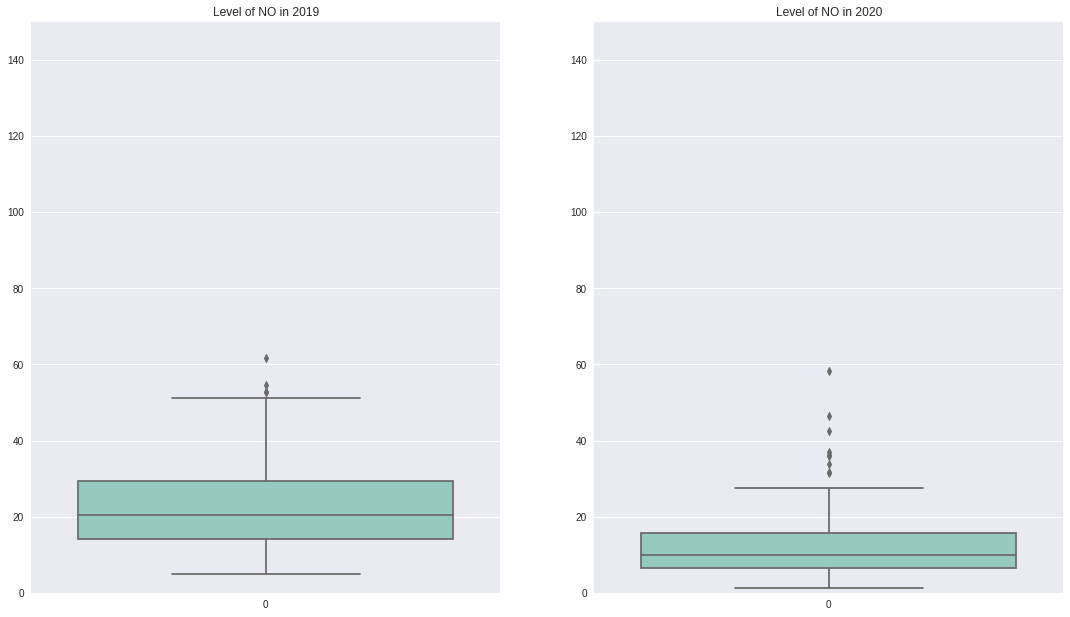

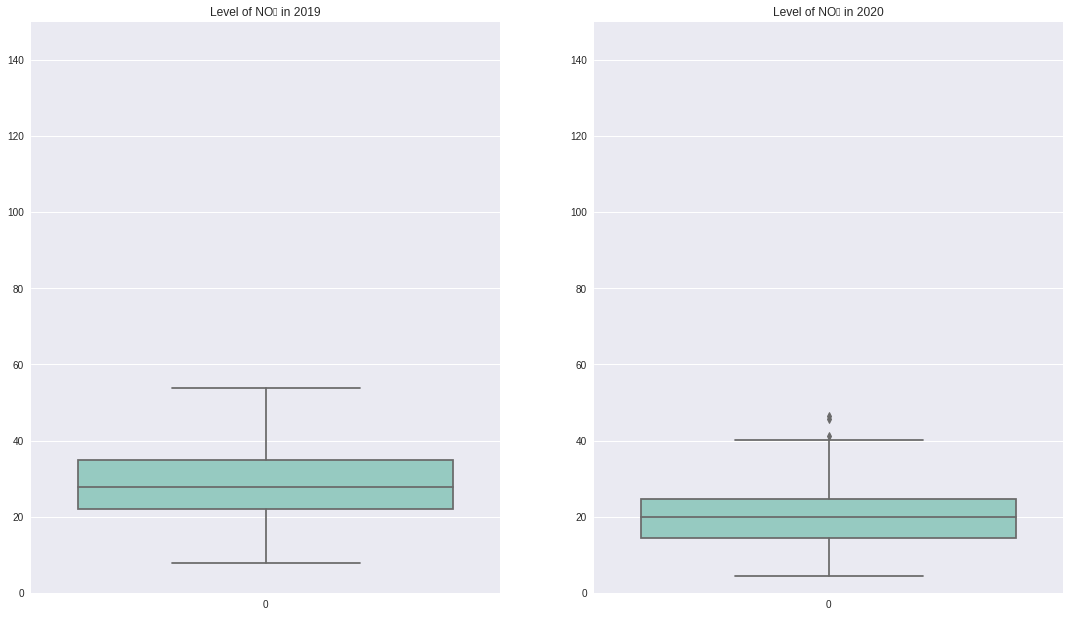

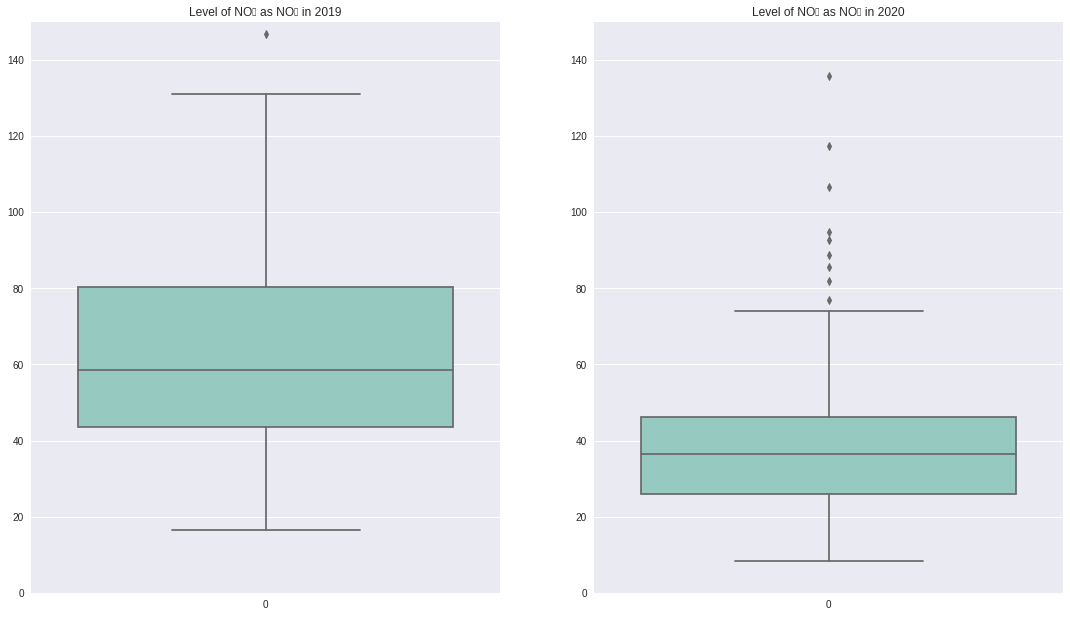

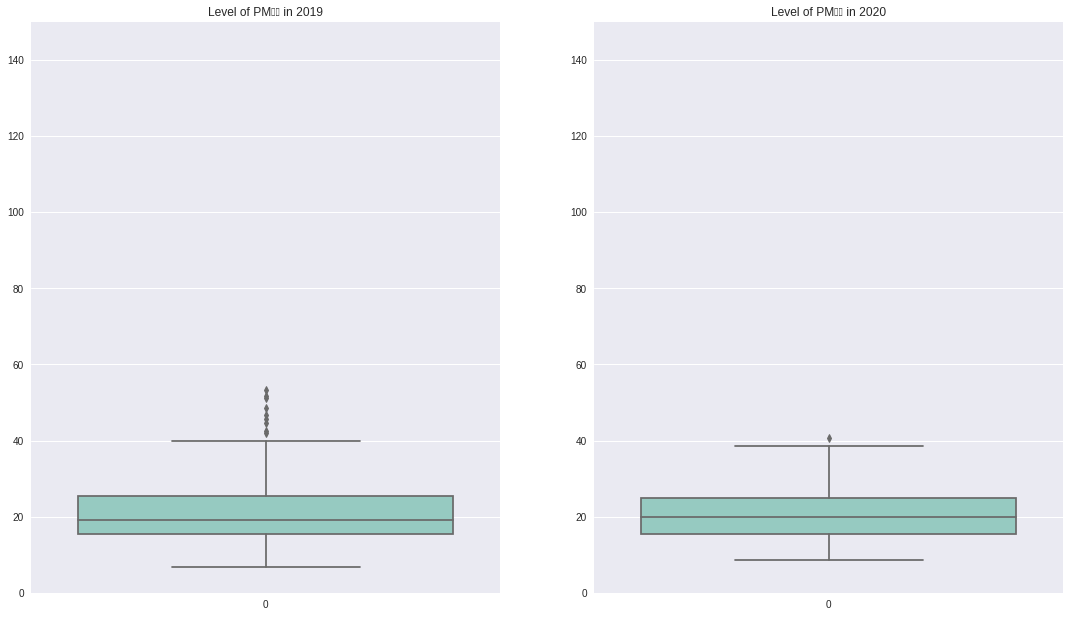

In [211]:
plot_boxplots(df_slice_19, df_slice_20)